# Project Objectives, Inputs, and Outputs

## Objectives:
The primary objective of this project is to develop a predictive model for house prices in Ames, Iowa. The model aims to provide accurate price estimates based on various house features, enabling better decision-making for property buyers and sellers. Additionally, the project focuses on exploring key factors influencing house prices and delivering data-driven insights to stakeholders.

## Inputs:
The project utilizes a dataset containing information about houses in Ames, Iowa. The dataset includes a variety of features such as area, number of rooms, amenities, and location-related attributes. These features serve as inputs for the predictive model, enabling the system to make price predictions.

**Dataset Columns:**
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second Floor square feet
- BedroomAbvGr: Bedrooms above ground
- BsmtFinSF1: Type 1 finished square feet in the basement
- GarageArea: Size of garage in square feet
- GrLivArea: Above ground living area square feet
- LotArea: Lot size in square feet
- MasVnrArea: Masonry veneer area in square feet
- OpenPorchSF: Open porch area in square feet
- OverallCond: Overall condition rating
- OverallQual: Overall material and finish quality rating
- TotalBsmtSF: Total basement square feet
- YearBuilt: Original construction year
- YearRemodAdd: Remodel date

## Outputs:
The main output of this project is the predicted house price for a given set of input features. The model generates accurate price estimates based on the provided inputs, allowing users to make informed decisions related to real estate transactions. Additionally, the project produces data visualizations and insights illustrating the relationships between various features and house prices, enhancing the understanding of the market dynamics.

---

*Note: The above information provides an overview of the project's objectives, the dataset's inputs, and the model's outputs. Further details and analysis can be found in the following sections of this notebook.*


1. Importing Libraries and Loading Data:
In this section, essential libraries are imported, including Pandas, NumPy, Seaborn, and Matplotlib. The dataset is loaded using Pandas' read_csv function and stored in the variable data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

2. Exploratory Data Analysis (EDA):
The data1 DataFrame is created as a deep copy of the original dataset for exploratory analysis. Initial data exploration includes checking the shape, information, and percentage of missing values. Visualizations like box plots and distribution plots are utilized to understand the numerical features, while count plots and bar plots are used for categorical features.

In [2]:
data = pd.read_csv('house_prices_records.csv')
data1 = data.copy(deep=True)

In [3]:
data1.shape

(1460, 24)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [5]:
data1.isnull().mean()*100

1stFlrSF          0.000000
2ndFlrSF          5.890411
BedroomAbvGr      6.780822
BsmtExposure      0.000000
BsmtFinSF1        0.000000
BsmtFinType1      7.808219
BsmtUnfSF         0.000000
EnclosedPorch    90.684932
GarageArea        0.000000
GarageFinish     11.095890
GarageYrBlt       5.547945
GrLivArea         0.000000
KitchenQual       0.000000
LotArea           0.000000
LotFrontage      17.739726
MasVnrArea        0.547945
OpenPorchSF       0.000000
OverallCond       0.000000
OverallQual       0.000000
TotalBsmtSF       0.000000
WoodDeckSF       89.383562
YearBuilt         0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
dtype: float64

In [6]:
data1 = data1.drop(['EnclosedPorch','WoodDeckSF'],axis=1)

In [7]:
data1.shape

(1460, 22)

In [8]:
data1.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'GarageArea', 'GarageFinish',
       'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage',
       'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice'],
      dtype='object')

In [9]:
data1.mean(numeric_only = True)

1stFlrSF          1162.626712
2ndFlrSF           348.524017
BedroomAbvGr         2.869214
BsmtFinSF1         443.639726
BsmtUnfSF          567.240411
GarageArea         472.980137
GarageYrBlt       1978.506164
GrLivArea         1515.463699
LotArea          10516.828082
LotFrontage         70.049958
MasVnrArea         103.685262
OpenPorchSF         46.660274
OverallCond          5.575342
OverallQual          6.099315
TotalBsmtSF       1057.429452
YearBuilt         1971.267808
YearRemodAdd      1984.865753
SalePrice       180921.195890
dtype: float64

In [10]:
num = data1.select_dtypes(include = 'number')
cat = data1.select_dtypes(include = 'object')

In [11]:
print(num)

      1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
0          856     854.0           3.0         706        150         548   
1         1262       0.0           3.0         978        284         460   
2          920     866.0           3.0         486        434         608   
3          961       NaN           NaN         216        540         642   
4         1145       NaN           4.0         655        490         836   
...        ...       ...           ...         ...        ...         ...   
1455       953     694.0           3.0           0        953         460   
1456      2073       0.0           NaN         790        589         500   
1457      1188    1152.0           4.0         275        877         252   
1458      1078       0.0           2.0          49          0         240   
1459      1256       0.0           3.0         830        136         276   

      GarageYrBlt  GrLivArea  LotArea  LotFrontage  MasVnrArea  OpenPorchSF

In [12]:
print(cat)

     BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0              No          GLQ          RFn          Gd
1              Gd          ALQ          RFn          TA
2              Mn          GLQ          RFn          Gd
3              No          ALQ          Unf          Gd
4              Av          GLQ          RFn          Gd
...           ...          ...          ...         ...
1455           No          Unf          RFn          TA
1456           No          ALQ          Unf          TA
1457           No          GLQ          RFn          Gd
1458           Mn          NaN          Unf          Gd
1459           No          BLQ          Fin          TA

[1460 rows x 4 columns]


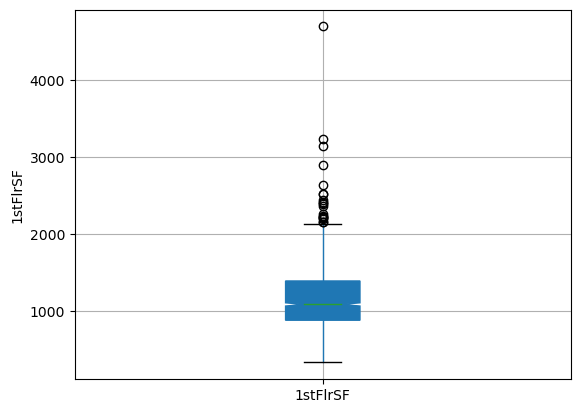

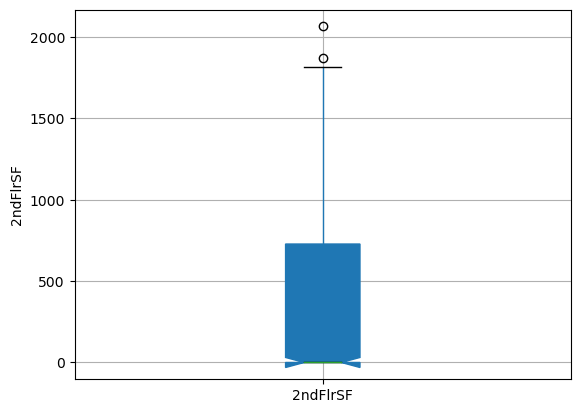

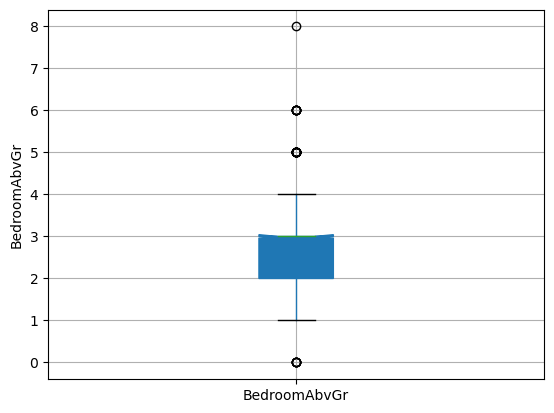

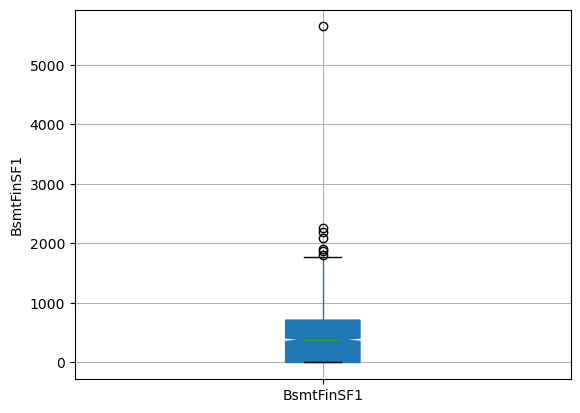

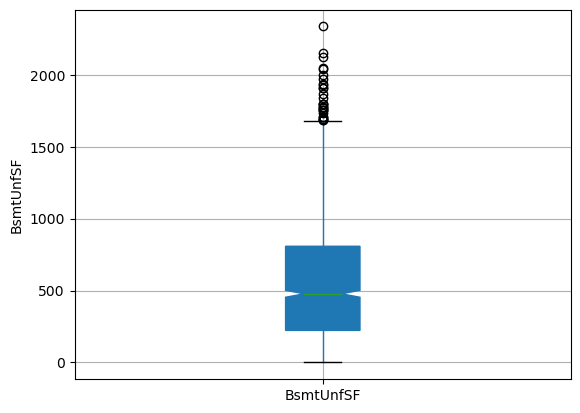

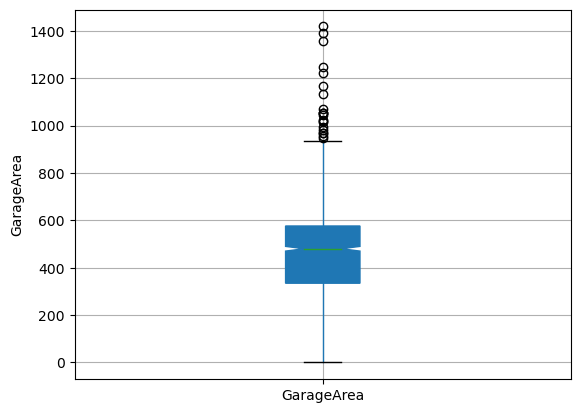

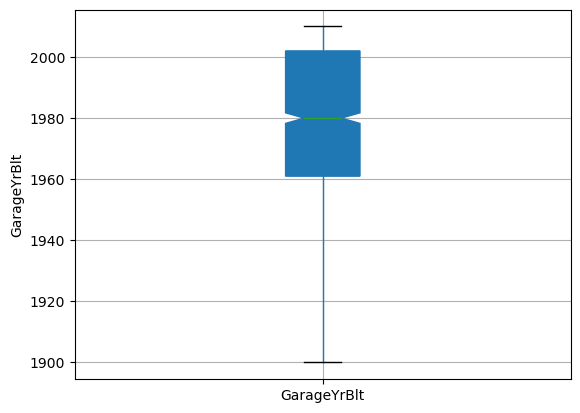

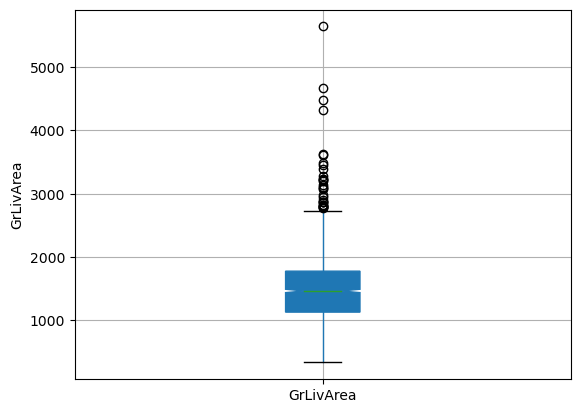

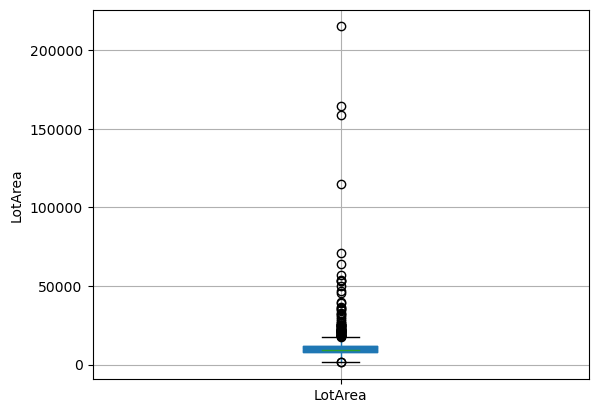

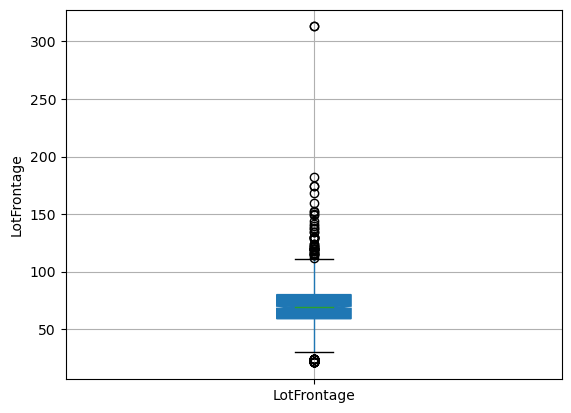

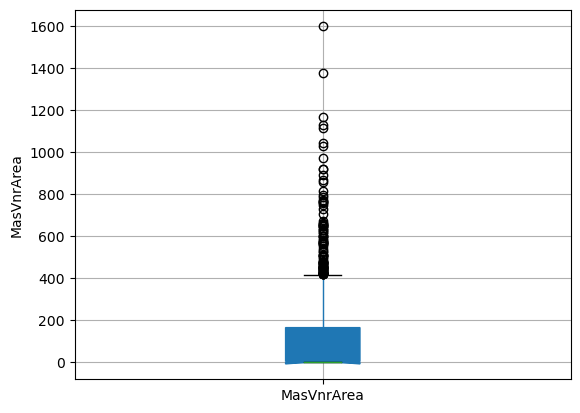

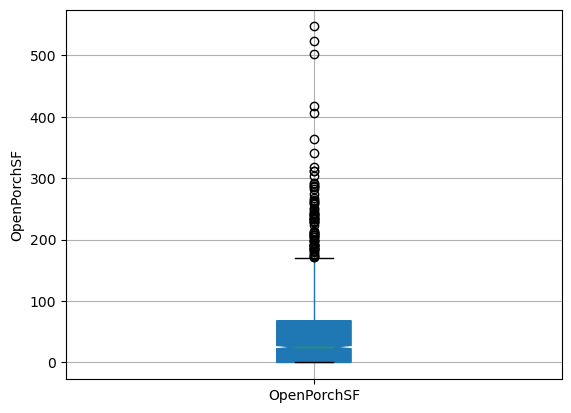

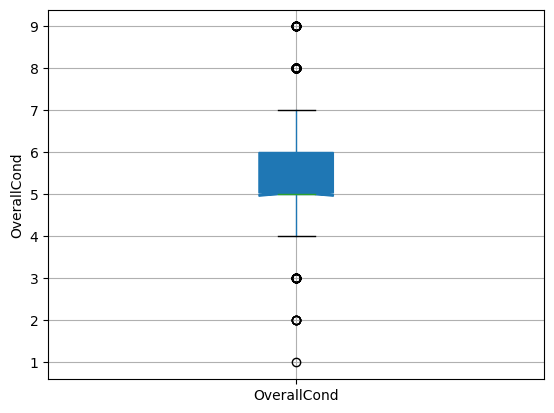

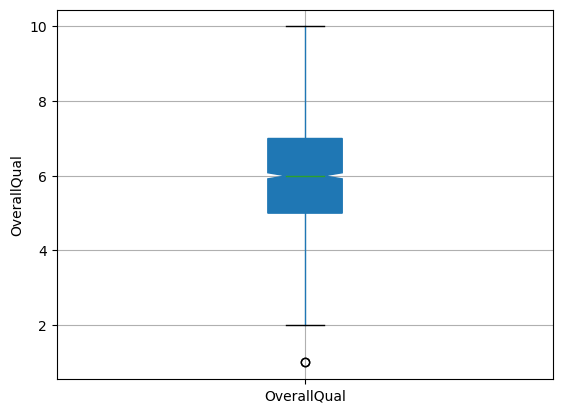

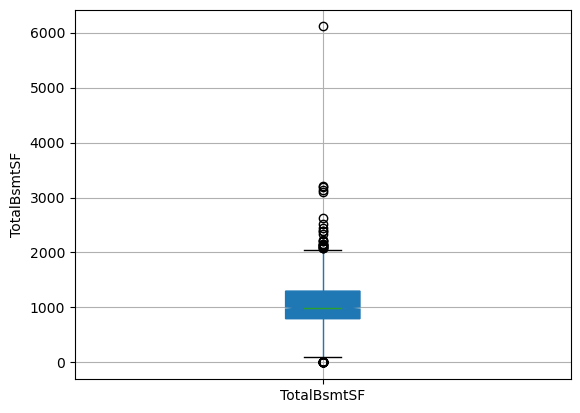

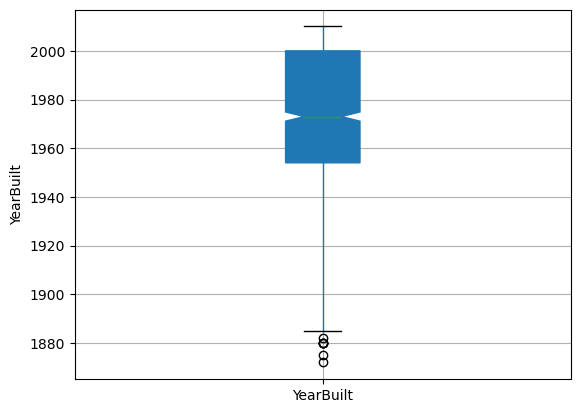

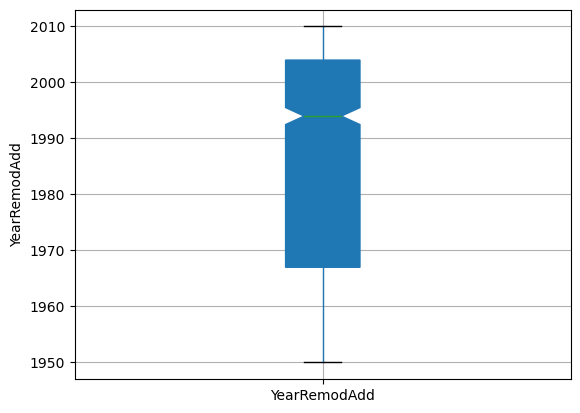

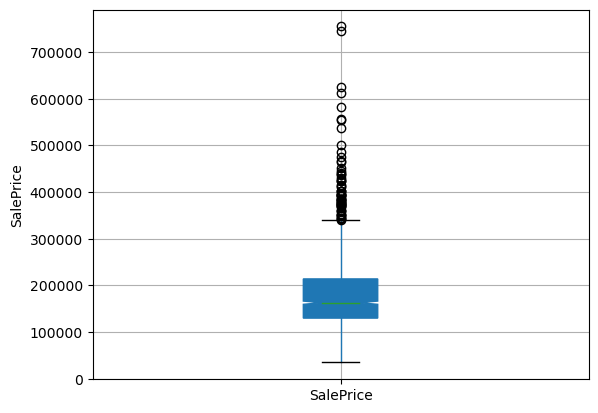

In [13]:
for i in num:
    num.boxplot(column = i, patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

3. Data Cleaning and Outlier Handling:
Outliers in the 'LotArea' feature are detected using the Interquartile Range (IQR) method. Data points beyond 1.5 times the IQR are considered outliers and removed. After outlier removal, visualizations are re-examined to ensure data integrity.

In [14]:
percentile25 = data1['LotArea'].quantile(0.25)
percentile75 = data1['LotArea'].quantile(0.75)
iqr=percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_data_points = data1[data1['LotArea'] > upper_limit]
lower_data_points = data1[data1['LotArea'] < lower_limit]

In [15]:
upper_data_points.shape

(67, 22)

In [16]:
print(lower_data_points)

      1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
956        561     668.0           2.0           No         285          ALQ   
1039       630       NaN           1.0           Av         509          GLQ   

      BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea  \
956         276         462          Fin       1980.0  ...     1300   
1039        121         286          Unf       1970.0  ...     1477   

     LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
956         24.0         0.0            0            6            6   
1039        21.0         0.0            0            4            4   

      TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
956           561       1980          1980     124000  
1039          630       1970          1970      80000  

[2 rows x 22 columns]


In [17]:
data1 = data1[(data1['LotArea'] < upper_limit) & (data1['LotArea'] > lower_limit)]

In [18]:
data1.shape

(1391, 22)

**OUTPUTS OF PLOTS ARE COLLAPSED IN ORDER TO MAKE THE NOTEBOOK LOOK CLEAN**

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


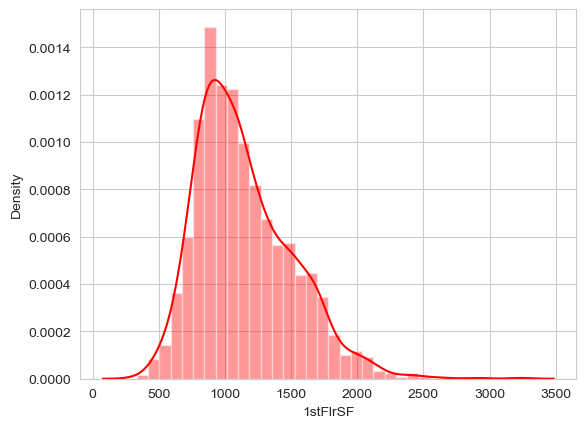

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


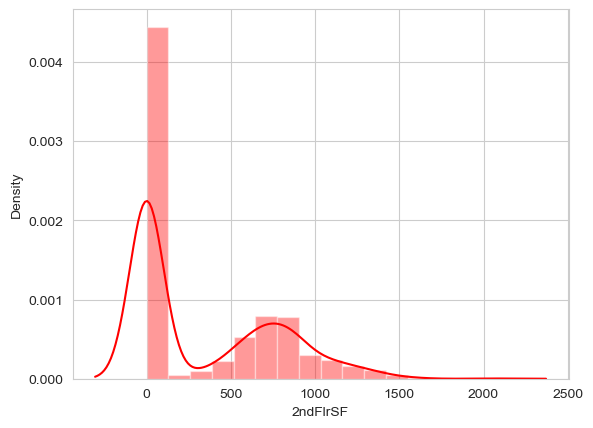

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


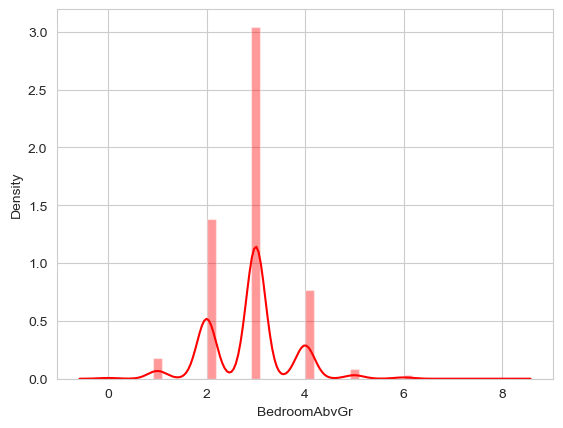

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


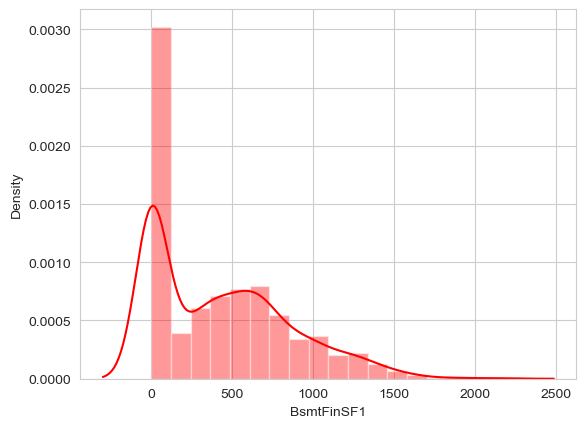

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


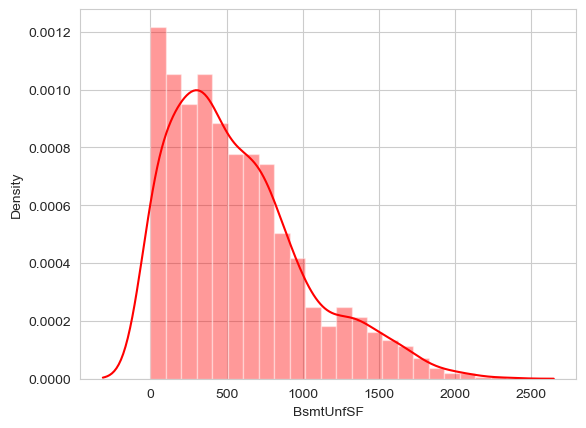

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


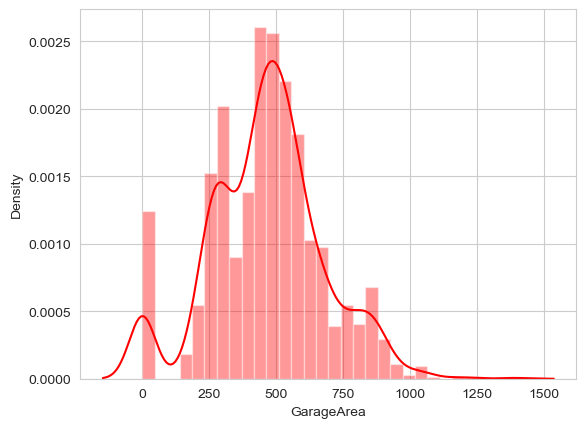

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


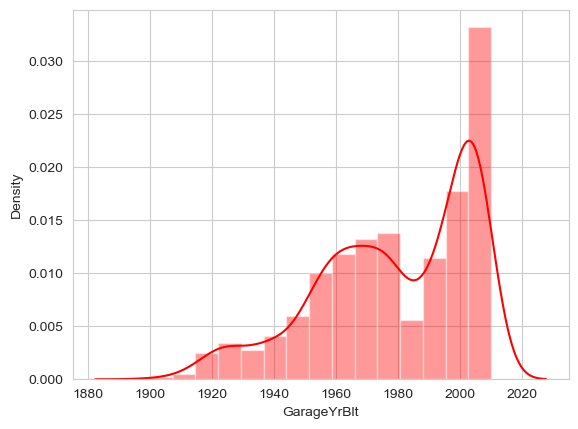

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


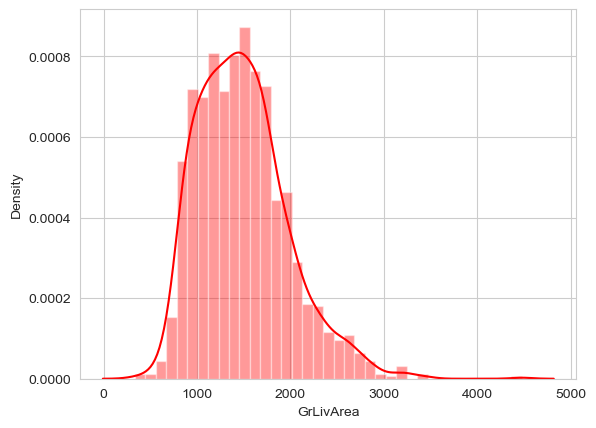

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


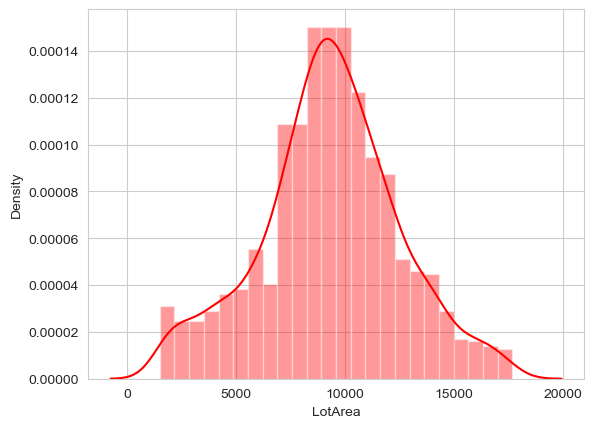

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


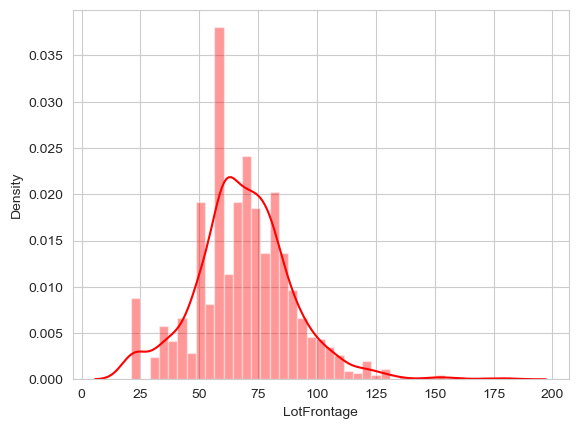

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


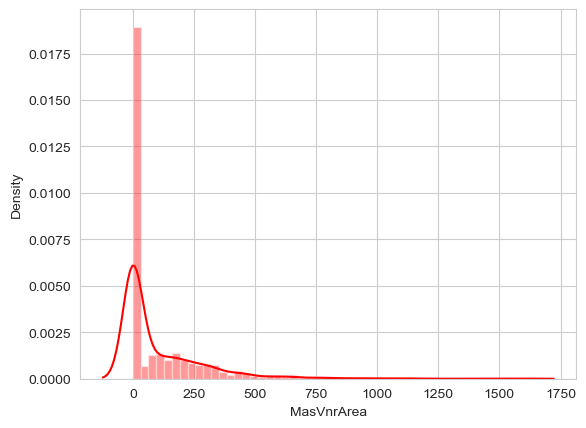

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


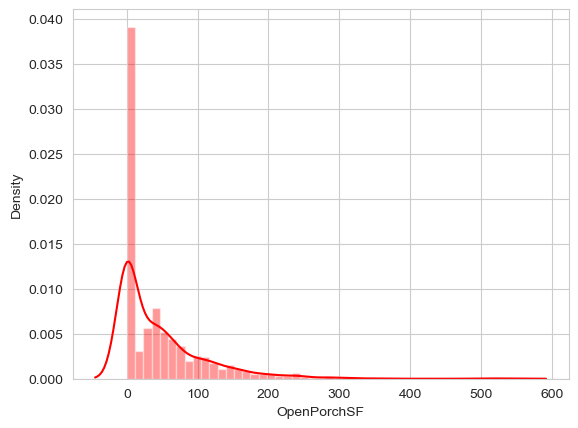

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


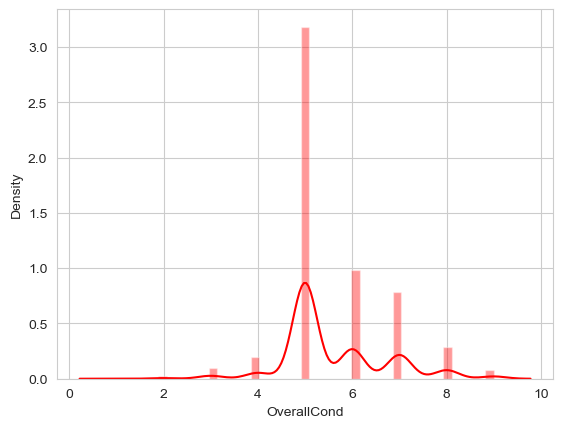

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


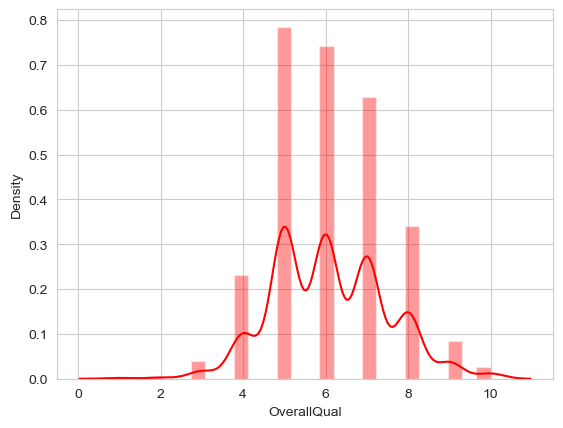

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


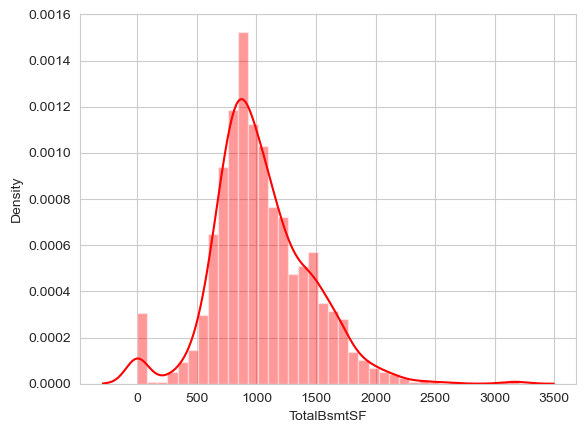

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


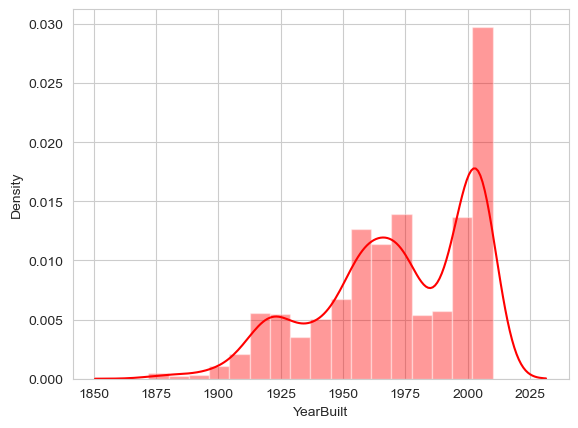

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


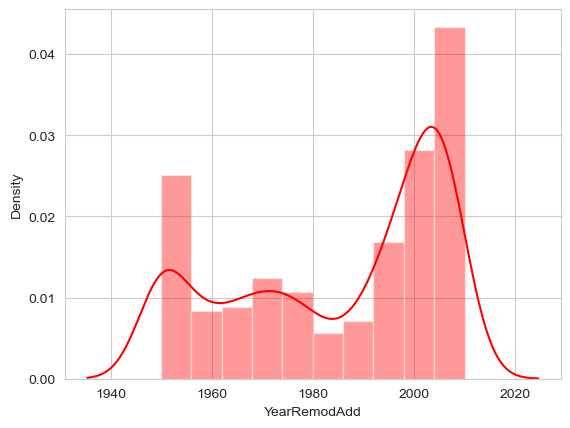

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\804662575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[j], kde = True, color = 'red')


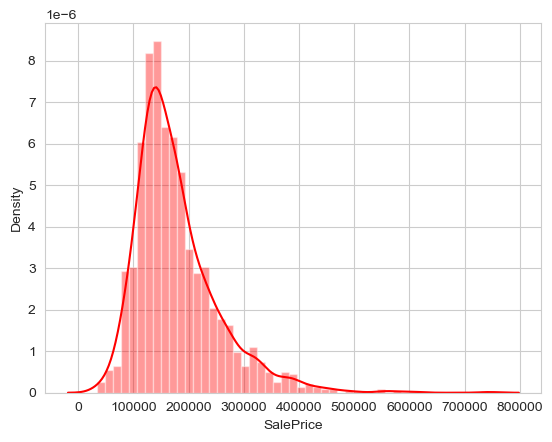

In [19]:
sns.set_style('whitegrid')
for j in num:
    sns.distplot(data1[j], kde = True, color = 'red')
    plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


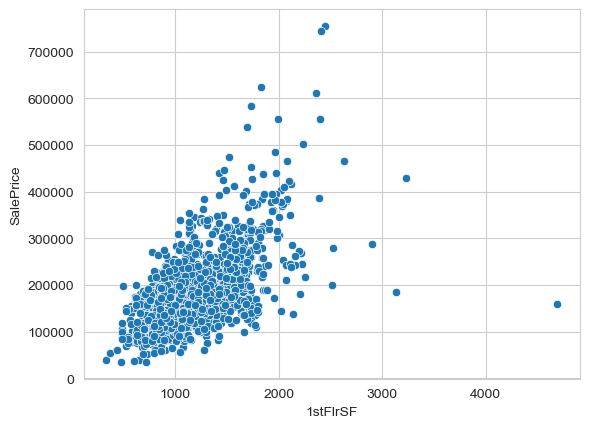

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


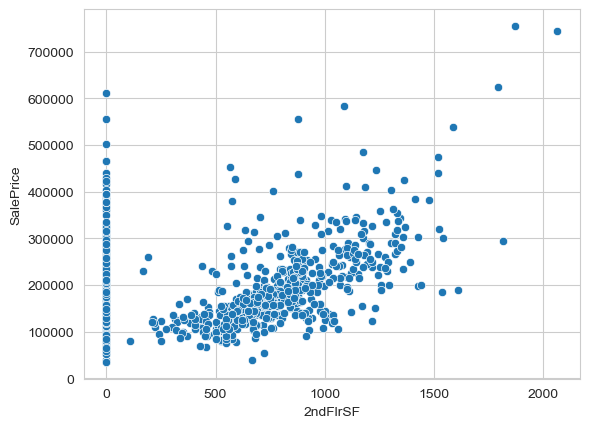

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


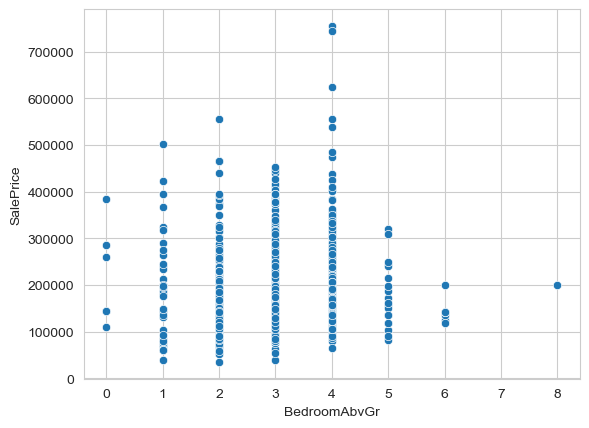

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


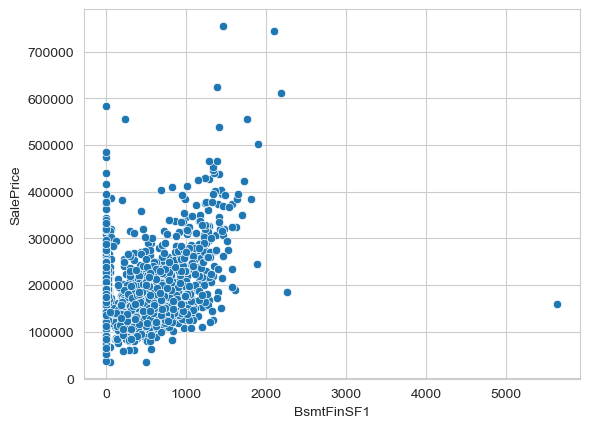

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


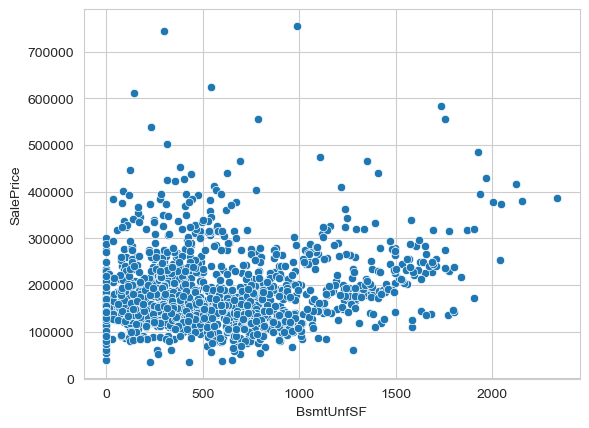

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


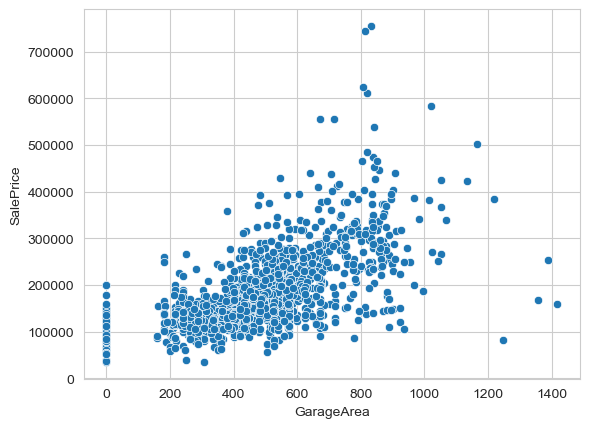

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


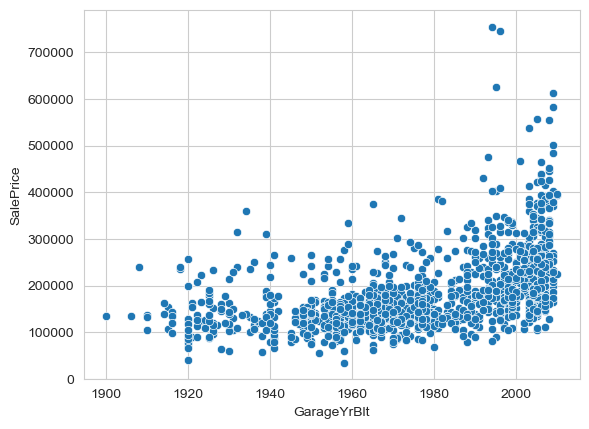

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


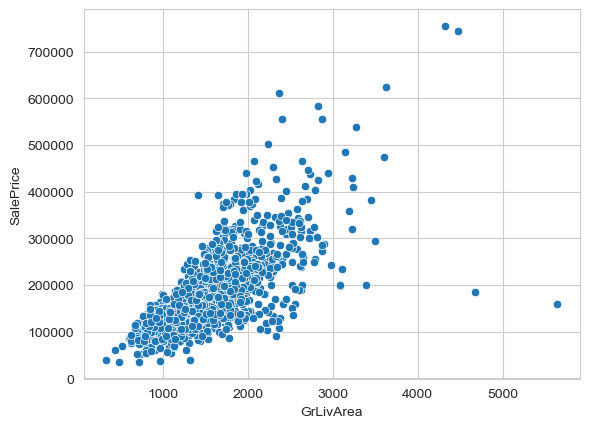

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


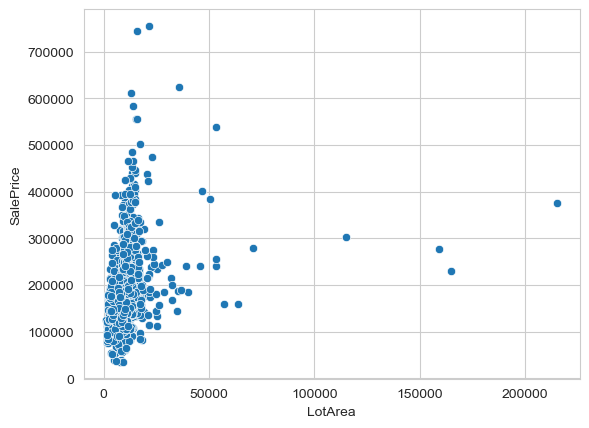

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


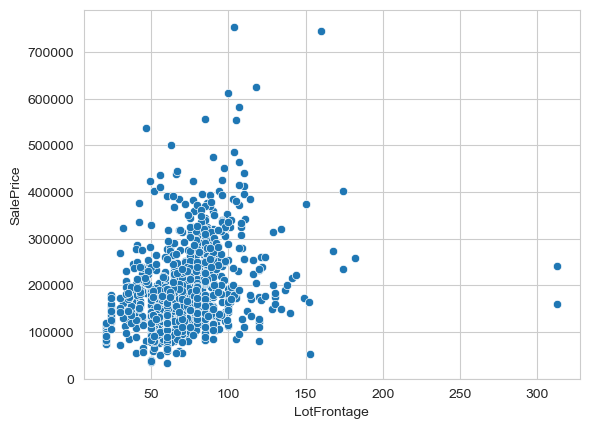

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


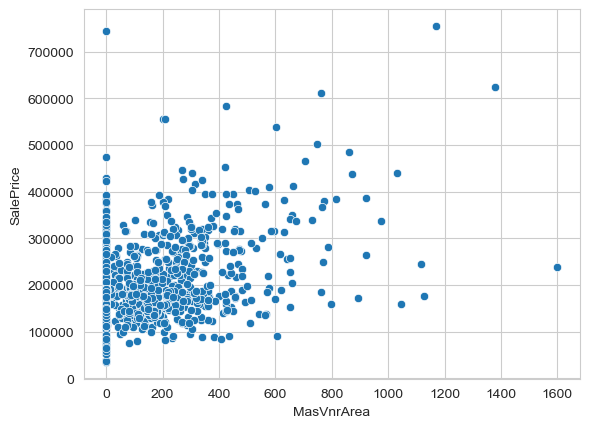

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


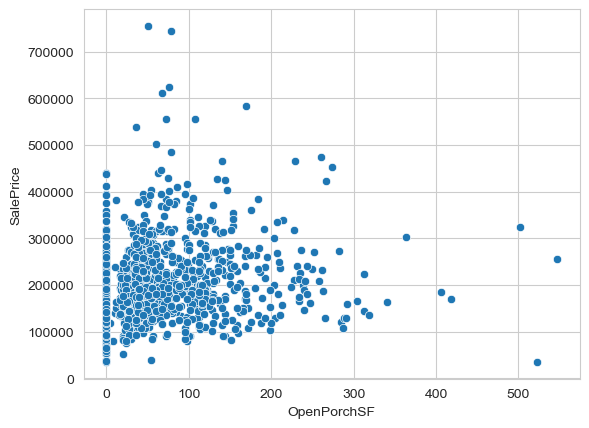

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


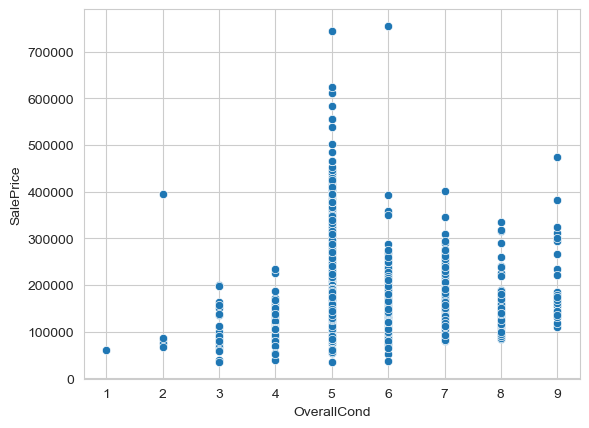

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


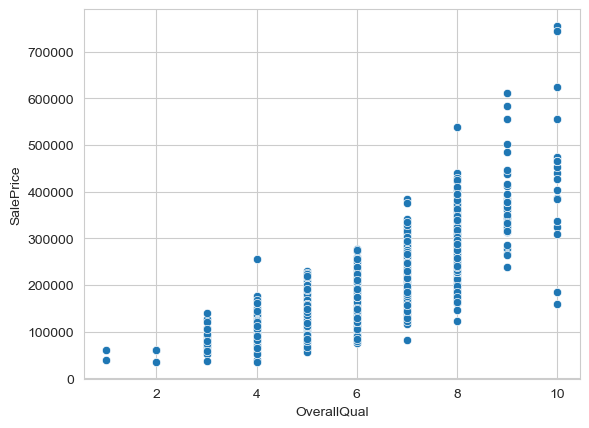

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


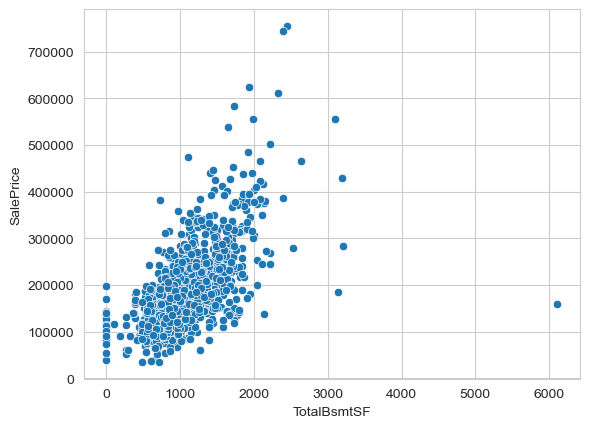

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


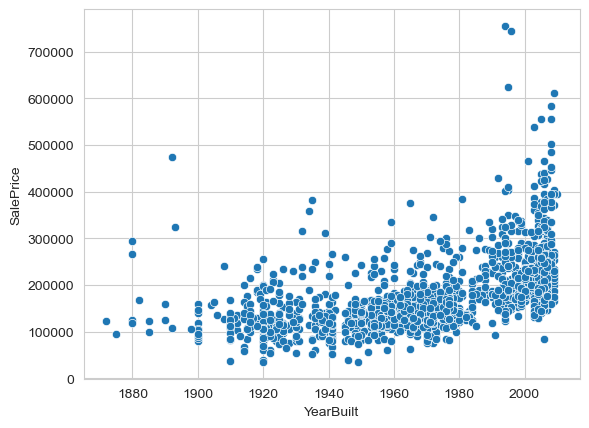

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


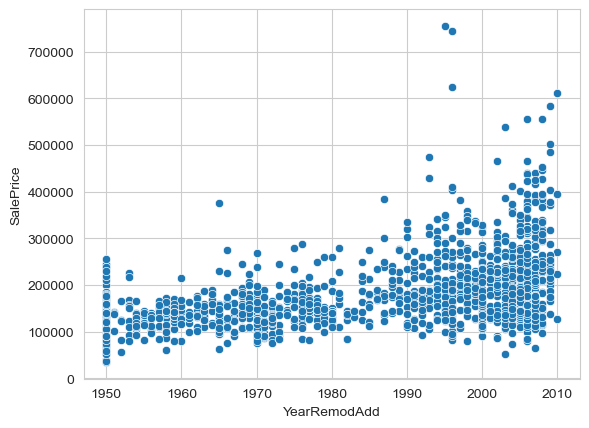

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\958235018.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')


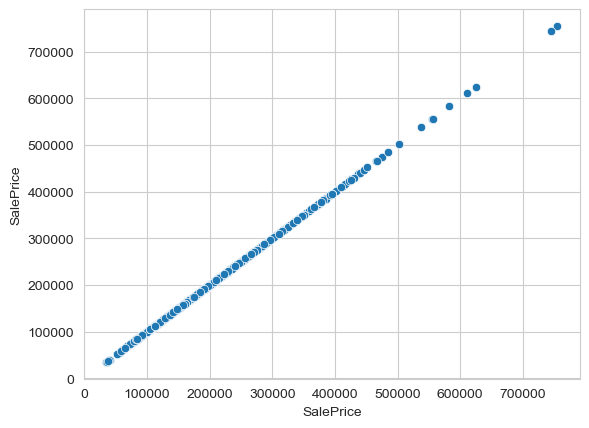

In [20]:
for i in num:
  sns.scatterplot(x = num[i], y = num['SalePrice'], palette='pastel')
  plt.show()

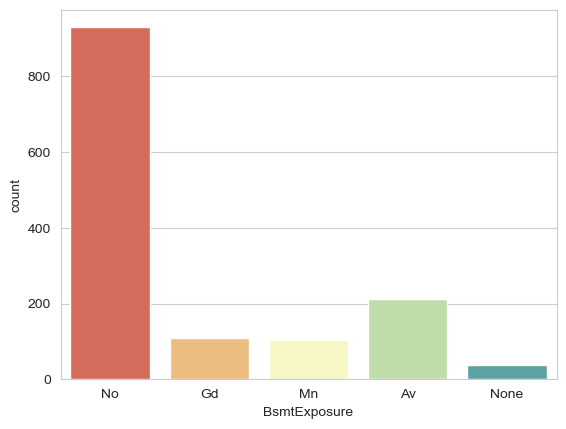

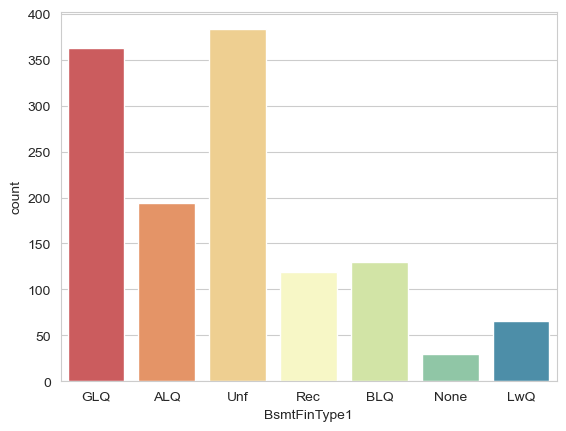

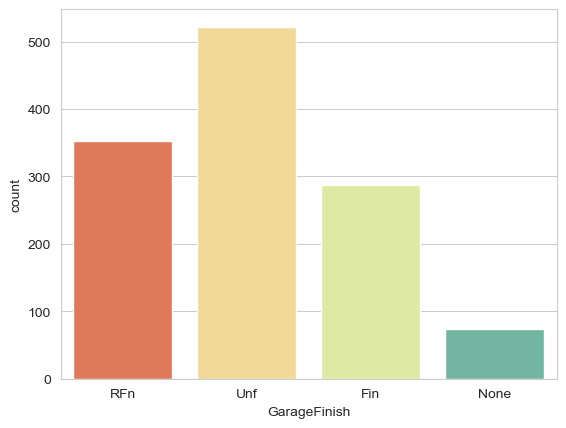

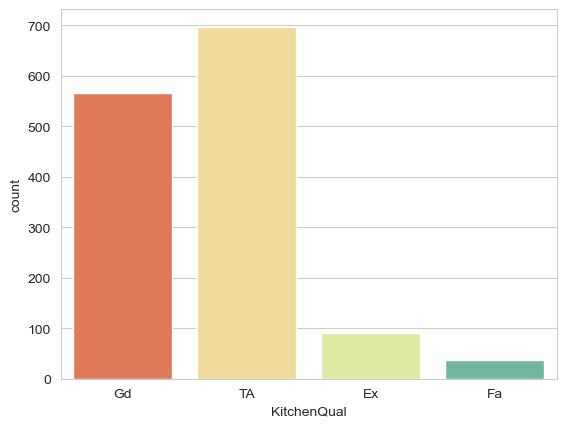

In [21]:
for i in cat:
  sns.countplot(x = data1[i], palette = "Spectral")
  plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\3048149242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = data1[i], y = data1['SalePrice'], ci = 0)


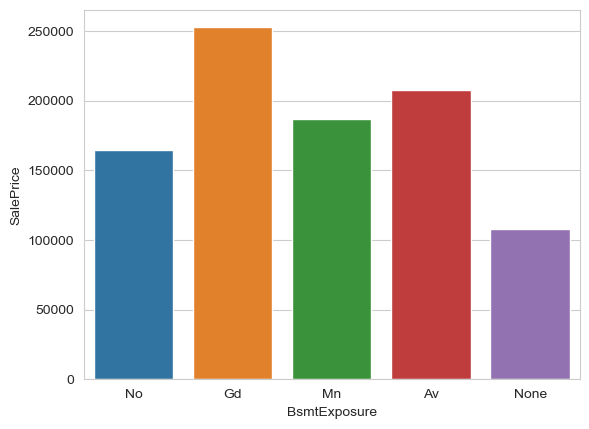

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\3048149242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = data1[i], y = data1['SalePrice'], ci = 0)


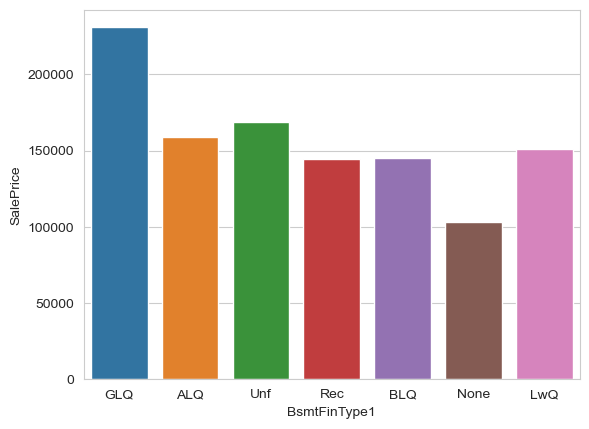

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\3048149242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = data1[i], y = data1['SalePrice'], ci = 0)


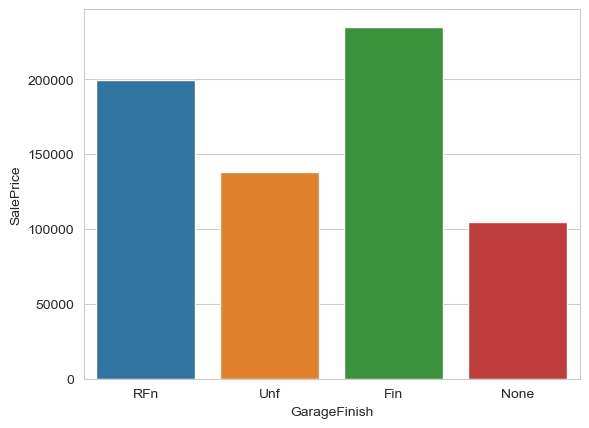

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\3048149242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x = data1[i], y = data1['SalePrice'], ci = 0)


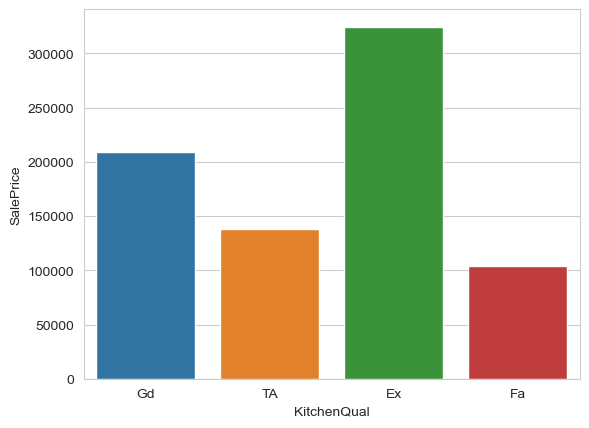

In [22]:
for i in cat:
  sns.barplot(x = data1[i], y = data1['SalePrice'], ci = 0)
  plt.show()

4. Data Preprocessing:
Categorical features are encoded using Label Encoding, and missing values are handled. For categorical variables, missing values are imputed with the mode, while numerical features are imputed with the median. The preprocessed data is then separated into input features (x) and target variable (y).

In [23]:
data1.isnull().mean()*100

1stFlrSF         0.000000
2ndFlrSF         6.110712
BedroomAbvGr     6.829619
BsmtExposure     0.000000
BsmtFinSF1       0.000000
BsmtFinType1     7.620417
BsmtUnfSF        0.000000
GarageArea       0.000000
GarageFinish    11.214953
GarageYrBlt      5.751258
GrLivArea        0.000000
KitchenQual      0.000000
LotArea          0.000000
LotFrontage     16.750539
MasVnrArea       0.503235
OpenPorchSF      0.000000
OverallCond      0.000000
OverallQual      0.000000
TotalBsmtSF      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
SalePrice        0.000000
dtype: float64

In [24]:
num = data1.select_dtypes(include = 'number')
cat = data1.select_dtypes(include = 'object')

In [25]:
# categorical values
print('Missing values before imputation \n', cat.isnull().sum())
cat.fillna(cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', cat.isnull().sum())

Missing values before imputation 
 BsmtExposure      0
BsmtFinType1    106
GarageFinish    156
KitchenQual       0
dtype: int64


Missing values after imputation 
 BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
KitchenQual     0
dtype: int64


In [26]:
# numerical values
print('Missing values before imputation \n', num.isnull().sum())
num.fillna(num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', num.isnull().sum())

Missing values before imputation 
 1stFlrSF          0
2ndFlrSF         85
BedroomAbvGr     95
BsmtFinSF1        0
BsmtUnfSF         0
GarageArea        0
GarageYrBlt      80
GrLivArea         0
LotArea           0
LotFrontage     233
MasVnrArea        7
OpenPorchSF       0
OverallCond       0
OverallQual       0
TotalBsmtSF       0
YearBuilt         0
YearRemodAdd      0
SalePrice         0
dtype: int64


Missing values after imputation 
 1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
BsmtUnfSF       0
GarageArea      0
GarageYrBlt     0
GrLivArea       0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64


In [27]:
data1.shape

(1391, 22)

In [28]:
x = data1.drop(['SalePrice'], axis = 1)
y = data1['SalePrice']

In [29]:
label_encoders = {}
categorical_cols = x.select_dtypes(include=['object']).columns

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    x[col] = label_encoders[col].fit_transform(x[col])

In [30]:
corr = data1.corr()*100
corr.style.background_gradient(cmap='coolwarm')

C:\Users\aryan\AppData\Local\Temp\ipykernel_13728\2394767915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()*100


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
1stFlrSF,100.000000,-25.328923,12.161423,38.746653,34.938758,48.256837,25.626880,51.903050,43.280688,41.983398,31.329677,17.727116,-15.784617,47.936879,80.937415,31.024086,25.116619,63.658495
2ndFlrSF,-25.328923,100.000000,50.071766,-17.875076,-0.846109,13.007233,6.027011,68.977500,10.737537,6.951417,13.976785,20.651949,0.811598,27.344336,-23.201848,1.357146,12.781777,29.194623
BedroomAbvGr,12.161423,50.071766,100.000000,-10.354003,14.374748,6.348166,-5.525187,54.097361,29.420492,27.576907,8.373969,8.898760,0.450460,8.723716,4.207217,-6.756663,-3.977679,15.279019
BsmtFinSF1,38.746653,-17.875076,-10.354003,100.000000,-52.412607,25.507343,15.988365,12.350216,19.529020,16.971171,22.096223,6.651939,-3.525671,21.494551,45.363119,25.321282,12.379267,39.420141
BsmtUnfSF,34.938758,-0.846109,14.374748,-52.412607,100.000000,20.370024,19.328394,25.662863,10.922626,16.081212,11.954840,13.997491,-15.092289,32.222321,45.686057,16.300652,19.106966,23.463678
GarageArea,48.256837,13.007233,6.348166,25.507343,20.370024,100.000000,59.268764,46.580861,34.016406,35.670661,37.247425,23.297120,-15.064684,57.766683,47.718832,51.082014,39.437862,65.074393
GarageYrBlt,25.626880,6.027011,-5.525187,15.988365,19.328394,59.268764,100.000000,24.836359,4.828596,10.629619,25.055831,24.788426,-34.272981,55.869543,34.944111,83.552051,65.010262,52.092239
GrLivArea,51.903050,68.977500,54.097361,12.350216,25.662863,46.580861,24.836359,100.000000,40.749133,37.013503,35.436161,31.660912,-10.431615,59.323374,39.286593,22.540867,29.439255,72.342057
LotArea,43.280688,10.737537,29.420492,19.529020,10.922626,34.016406,4.828596,40.749133,100.000000,67.386407,14.992116,13.239455,-2.117762,24.230594,34.340385,10.332459,7.641600,43.044213
LotFrontage,41.983398,6.951417,27.576907,16.971171,16.081212,35.670661,10.629619,37.013503,67.386407,100.000000,19.366630,12.841367,-5.955841,26.862501,35.874861,16.402972,9.998722,41.144951


In [31]:
prediction_data = pd.read_csv('inherited_houses.csv')

In [32]:
prediction_data.shape

(4, 23)

5. Feature Engineering and Encoding:
Label Encoding is applied to categorical columns. The encoded data is then combined with additional features from the 'prediction_data_edited.csv' file. Categorical columns are transformed using Label Encoders and one-hot encoding.

In [33]:
for col in categorical_cols:
    prediction_data[col] = label_encoders[col].transform(prediction_data[col])

In [34]:
prediction_data = prediction_data.drop(['WoodDeckSF','EnclosedPorch'],axis=1)

In [35]:
prediction_data.to_csv('prediction_data_edited.csv',index=False)

In [36]:
import pickle

**EXPERIMENT BEGINS**

In [37]:
prediction_data_edited = pd.read_csv('prediction_data_edited.csv')

In [38]:
combined_data = pd.concat([x, prediction_data_edited], axis=0)

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']:
    label_encoders[col] = LabelEncoder()
    combined_data[col] = label_encoders[col].fit_transform(combined_data[col])

In [40]:
combined_data = pd.get_dummies(combined_data, columns=['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'])

In [41]:
new_train_data = combined_data[:len(x)]
new_test_data = combined_data[len(x):]

In [42]:
new_train_data.to_csv('train.csv')
y.to_csv('test.csv')

End of Data Cleaning and Preprocessing